In [44]:
# packages to use

import pandas as pd
import matplotlib.pyplot as plt
import itertools
import datetime
from ipywidgets import widgets
import numpy as np
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
#sns.reset_defaults()
sns.set_style("whitegrid")
import matplotlib.dates as mdates

# ipython magic %matplotlib inline - allow to visualize the time series in the notebook

%matplotlib inline

# Reading Data

In [74]:
df_spx = pd.read_csv('datasets/spx.csv', index_col='Date', parse_dates=True)
df_gold = pd.read_csv('datasets/gold.csv', index_col='Date', parse_dates=True)
df_btc = pd.read_csv('datasets/btc.csv', index_col='Date', parse_dates=True)
df_dji = pd.read_csv('datasets/dji.csv', index_col='Date', parse_dates=True)
df_eth = pd.read_csv('datasets/eth.csv', index_col='Date', parse_dates=True)
df_copper = pd.read_csv('datasets/copper.csv', index_col='Date', parse_dates=True)
df_oil = pd.read_csv('datasets/oil.csv', index_col='Date', parse_dates=True)
df_gas = pd.read_csv('datasets/gas.csv', index_col='Date', parse_dates=True)
df_silver = pd.read_csv('datasets/silver.csv', index_col='Date', parse_dates=True)
df_usd = pd.read_csv('datasets/usd.csv', index_col='Date', parse_dates=True)

In [75]:
display(df_spx, df_gold, df_btc, df_dji, df_eth, df_copper, df_oil, df_gas, df_silver, df_usd)

Price      Open      High       Low  Vol. Change %
Date                                                             
2022-12-28  3,783.22  3,829.56  3,848.32  3,780.78   NaN   -1.20%
2022-12-27  3,829.25  3,843.34  3,846.65  3,813.22   NaN   -0.40%
2022-12-23  3,844.82  3,815.11  3,845.80  3,797.01   NaN    0.59%
2022-12-22  3,822.39  3,853.26  3,853.26  3,764.49   NaN   -1.45%
2022-12-21  3,878.44  3,839.49  3,889.82  3,839.49   NaN    1.49%
...              ...       ...       ...       ...   ...      ...
2017-01-09  2,268.90  2,273.59  2,275.49  2,268.90   NaN   -0.35%
2017-01-06  2,276.98  2,271.14  2,282.10  2,264.06   NaN    0.35%
2017-01-05  2,269.00  2,268.18  2,271.50  2,260.45   NaN   -0.08%
2017-01-04  2,270.75  2,261.60  2,272.82  2,261.60   NaN    0.57%
2017-01-03  2,257.83  2,251.57  2,263.88  2,245.13   NaN    0.85%

[1508 rows x 6 columns]

Price      Open      High       Low     Vol. Change %
Date                                                                
2022-12-29  1,813.55  1,812.70  1,818.75  1,811.25      NaN   -0.12%
2022-12-28  1,815.80  1,822.40  1,822.80  1,804.20      NaN   -0.40%
2022-12-27  1,823.10  1,808.20  1,841.90  1,808.00  159.62K    0.74%
2022-12-26  1,809.70  1,805.80  1,811.95  1,805.55      NaN    0.30%
2022-12-23  1,804.20  1,801.00  1,812.20  1,798.90  105.46K    0.50%
...              ...       ...       ...       ...      ...      ...
2017-01-09  1,186.30  1,174.90  1,187.20  1,174.60    0.21K    0.98%
2017-01-06  1,174.80  1,179.70  1,180.10  1,172.60    0.19K   -0.66%
2017-01-05  1,182.60  1,165.30  1,186.50  1,165.30    0.20K    1.38%
2017-01-04  1,166.50  1,158.10  1,168.50  1,158.10    0.24K    0.28%
2017-01-03  1,163.20  1,154.00  1,165.00  1,148.10    0.22K    0.89%

[1549 rows x 6 columns]

Price      Open      High       Low    Vol. Change %
Date                                                               
2022-12-29  16,621.0  16,558.0  16,633.0  16,505.0   1.64K    0.38%
2022-12-28  16,558.0  16,719.0  16,796.0  16,490.0   1.59K   -0.96%
2022-12-27  16,719.0  16,946.0  16,987.0  16,631.0   0.94K   -1.34%
2022-12-26  16,946.0  16,847.0  16,958.0  16,814.0   0.32K    0.59%
2022-12-25  16,847.0  16,864.0  16,874.0  16,760.0   0.38K   -0.10%
...              ...       ...       ...       ...     ...      ...
2017-01-05   1,003.2   1,139.8   1,166.0     865.4  91.20K  -11.97%
2017-01-04   1,139.6   1,037.5   1,150.0   1,036.4  53.73K    9.84%
2017-01-03   1,037.5   1,019.3   1,038.7   1,013.5  14.11K    1.79%
2017-01-02   1,019.3     999.2   1,034.8     997.3  21.82K    2.03%
2017-01-01     999.0     966.6   1,006.5     961.3  13.44K    3.35%

[2189 rows x 6 columns]

Price       Open       High        Low     Vol. Change %
Date                                                                    
2022-12-28  32,875.01  33,264.76  33,377.35  32,872.15  247.02M   -1.10%
2022-12-27  33,241.69  33,271.90  33,387.12  33,069.58  235.96M    0.11%
2022-12-23  33,204.26  32,961.06  33,225.83  32,815.26  218.35M    0.53%
2022-12-22  33,028.22  33,233.35  33,233.35  32,573.43  326.11M   -1.04%
2022-12-21  33,376.48  33,028.09  33,437.84  33,028.09  311.43M    1.60%
...               ...        ...        ...        ...      ...      ...
2017-01-09  19,887.38  19,931.41  19,943.78  19,887.38  287.51M   -0.38%
2017-01-06  19,963.80  19,906.96  19,999.63  19,834.08  277.70M    0.32%
2017-01-05  19,899.29  19,924.56  19,948.60  19,811.12  269.92M   -0.21%
2017-01-04  19,942.16  19,890.94  19,956.14  19,878.83  280.01M    0.30%
2017-01-03  19,881.76  19,872.86  19,938.53  19,775.93  339.18M    0.60%

[1508 rows x 6 columns]

Price      Open      High       Low     Vol. Change %
Date                                                                
2022-12-29  1,192.81  1,189.99  1,197.23  1,187.19  349.92K    0.24%
2022-12-28  1,189.98  1,211.60  1,214.32  1,184.22  407.45K   -1.78%
2022-12-27  1,211.60  1,228.22  1,233.15  1,202.02  290.02K   -1.31%
2022-12-26  1,227.65  1,218.69  1,230.37  1,213.08  177.66K    0.73%
2022-12-25  1,218.69  1,220.46  1,223.82  1,201.20  256.52K   -0.15%
...              ...       ...       ...       ...      ...      ...
2017-01-05     10.15     11.16     11.70      9.20  490.64K   -7.73%
2017-01-04     11.00      9.57     11.10      9.44  556.25K   12.94%
2017-01-03      9.74      8.43      9.90      8.30  603.42K   16.37%
2017-01-02      8.37      8.19      8.50      8.11  101.27K    2.07%
2017-01-01      8.20      8.17      8.59      8.03  144.92K    2.50%

[2189 rows x 6 columns]

Price    Open    High     Low    Vol. Change %
Date                                                       
2022-12-29  3.8243  3.8342  3.8522  3.8083     NaN   -0.47%
2022-12-28  3.8425  3.8490  3.8730  3.8210     NaN    0.05%
2022-12-27  3.8405  3.8400  3.9415  3.8320  48.12K   -0.44%
2022-12-26  3.8575  3.8125  3.8675  3.8125     NaN    1.27%
2022-12-23  3.8090  3.7645  3.8170  3.7610  38.56K    1.38%
...            ...     ...     ...     ...     ...      ...
2017-01-09  2.5385  2.5440  2.5505  2.5195  58.42K   -0.29%
2017-01-06  2.5460  2.5350  2.5480  2.5125  52.46K    0.33%
2017-01-05  2.5375  2.5570  2.5885  2.5305  67.50K   -0.74%
2017-01-04  2.5565  2.4880  2.5630  2.4725  71.97K    2.71%
2017-01-03  2.4890  2.5070  2.5485  2.4860  68.38K   -0.66%

[1564 rows x 6 columns]

Price   Open   High    Low     Vol. Change %
Date                                                    
2022-12-29  77.84  78.61  78.83  76.81      NaN   -0.97%
2022-12-28  78.60  79.75  79.88  77.33      NaN   -1.47%
2022-12-27  79.77  80.97  81.17  79.17      NaN   -1.48%
2022-12-26  80.97  79.92  81.06  79.92      NaN    2.05%
2022-12-23  79.34  78.44  80.31  78.00      NaN    1.13%
...           ...    ...    ...    ...      ...      ...
2017-01-06  53.99  53.73  54.32  53.32  528.33K    0.43%
2017-01-05  53.76  53.39  54.12  52.79  517.36K    0.94%
2017-01-04  53.26  52.49  53.43  52.15  512.64K    1.78%
2017-01-03  52.33  54.20  55.24  52.11  727.79K   -3.15%
2017-01-02  54.03  54.09  54.18  54.01      NaN    0.58%

[1584 rows x 6 columns]

Price   Open   High    Low     Vol. Change %
Date                                                    
2022-12-29  4.651  4.774  4.788  4.602      NaN   -1.23%
2022-12-28  4.709  5.183  5.183  4.588      NaN  -10.85%
2022-12-27  5.282  5.283  5.367  5.081   41.15K    2.68%
2022-12-26  5.144  5.179  5.188  5.037      NaN    3.29%
2022-12-23  4.980  5.014  5.139  4.779   87.38K    1.06%
...           ...    ...    ...    ...      ...      ...
2017-01-06  3.285  3.304  3.358  3.214  140.08K    0.37%
2017-01-05  3.273  3.260  3.346  3.172  208.43K    0.18%
2017-01-04  3.267  3.317  3.358  3.236  171.53K   -1.80%
2017-01-03  3.327  3.568  3.568  3.267  254.13K   -4.94%
2017-01-02  3.500  3.560  3.560  3.459      NaN   -6.02%

[1581 rows x 6 columns]

Price    Open    High     Low    Vol. Change %
Date                                                       
2022-12-29  24.040  23.712  24.125  23.692     NaN    0.84%
2022-12-28  23.840  24.240  24.275  23.645     NaN   -1.56%
2022-12-27  24.217  24.050  24.495  23.975  45.23K    0.67%
2022-12-26  24.055  24.008  24.168  23.968     NaN    0.56%
2022-12-23  23.920  23.740  24.095  23.685  31.56K    1.26%
...            ...     ...     ...     ...     ...      ...
2017-01-09  16.683  16.520  16.735  16.455  46.50K    0.99%
2017-01-06  16.519  16.635  16.715  16.260  68.14K   -0.71%
2017-01-05  16.637  16.495  16.760  16.455  67.64K    0.51%
2017-01-04  16.552  16.345  16.570  16.300  52.45K    0.87%
2017-01-03  16.409  15.970  16.550  15.935  81.14K    2.63%

[1539 rows x 6 columns]

Price     Open     High      Low    Vol. Change %
Date                                                           
2022-12-29  103.980  104.062  104.215  103.840       -   -0.19%
2022-12-28  104.182  104.005  104.270  103.565  19.01K    0.28%
2022-12-27  103.893  103.835  104.110  103.585  13.28K   -0.11%
2022-12-23  104.010  104.175  104.235  103.815  15.93K   -0.11%
2022-12-22  104.127  103.800  104.300  103.435  21.05K    0.27%
...             ...      ...      ...      ...     ...      ...
2017-01-09  101.844  102.160  102.370  101.790   0.14K   -0.29%
2017-01-06  102.139  101.470  102.180  101.420   0.26K    0.68%
2017-01-05  101.453  102.070  102.420  101.240   0.34K   -1.17%
2017-01-04  102.649  103.370  103.370  102.320   0.23K   -0.48%
2017-01-03  103.146  102.795  103.750  102.600   0.27K    0.87%

[1548 rows x 6 columns]

# Renaming Price columns to the respective dataset name

In [76]:
df_spx.rename(columns={"Price": "Spx"}, inplace = True)
df_gold.rename(columns={"Price": "Gold"}, inplace = True)
df_btc.rename(columns={"Price": "Btc"}, inplace = True)
df_dji.rename(columns={"Price": "Dji"}, inplace = True)
df_eth.rename(columns={"Price": "Eth"}, inplace = True)
df_copper.rename(columns={"Price": "Copper"}, inplace = True)
df_oil.rename(columns={"Price": "Oil"}, inplace = True)
df_gas.rename(columns={"Price": "Gas"}, inplace = True)
df_silver.rename(columns={"Price": "Silver"}, inplace = True)
df_usd.rename(columns={"Price": "USD"}, inplace = True)

In [77]:
display(df_spx, df_gold, df_btc, df_dji, df_eth, df_copper, df_oil, df_gas, df_silver, df_usd)

Spx      Open      High       Low  Vol. Change %
Date                                                             
2022-12-28  3,783.22  3,829.56  3,848.32  3,780.78   NaN   -1.20%
2022-12-27  3,829.25  3,843.34  3,846.65  3,813.22   NaN   -0.40%
2022-12-23  3,844.82  3,815.11  3,845.80  3,797.01   NaN    0.59%
2022-12-22  3,822.39  3,853.26  3,853.26  3,764.49   NaN   -1.45%
2022-12-21  3,878.44  3,839.49  3,889.82  3,839.49   NaN    1.49%
...              ...       ...       ...       ...   ...      ...
2017-01-09  2,268.90  2,273.59  2,275.49  2,268.90   NaN   -0.35%
2017-01-06  2,276.98  2,271.14  2,282.10  2,264.06   NaN    0.35%
2017-01-05  2,269.00  2,268.18  2,271.50  2,260.45   NaN   -0.08%
2017-01-04  2,270.75  2,261.60  2,272.82  2,261.60   NaN    0.57%
2017-01-03  2,257.83  2,251.57  2,263.88  2,245.13   NaN    0.85%

[1508 rows x 6 columns]

Gold      Open      High       Low     Vol. Change %
Date                                                                
2022-12-29  1,813.55  1,812.70  1,818.75  1,811.25      NaN   -0.12%
2022-12-28  1,815.80  1,822.40  1,822.80  1,804.20      NaN   -0.40%
2022-12-27  1,823.10  1,808.20  1,841.90  1,808.00  159.62K    0.74%
2022-12-26  1,809.70  1,805.80  1,811.95  1,805.55      NaN    0.30%
2022-12-23  1,804.20  1,801.00  1,812.20  1,798.90  105.46K    0.50%
...              ...       ...       ...       ...      ...      ...
2017-01-09  1,186.30  1,174.90  1,187.20  1,174.60    0.21K    0.98%
2017-01-06  1,174.80  1,179.70  1,180.10  1,172.60    0.19K   -0.66%
2017-01-05  1,182.60  1,165.30  1,186.50  1,165.30    0.20K    1.38%
2017-01-04  1,166.50  1,158.10  1,168.50  1,158.10    0.24K    0.28%
2017-01-03  1,163.20  1,154.00  1,165.00  1,148.10    0.22K    0.89%

[1549 rows x 6 columns]

Btc      Open      High       Low    Vol. Change %
Date                                                               
2022-12-29  16,621.0  16,558.0  16,633.0  16,505.0   1.64K    0.38%
2022-12-28  16,558.0  16,719.0  16,796.0  16,490.0   1.59K   -0.96%
2022-12-27  16,719.0  16,946.0  16,987.0  16,631.0   0.94K   -1.34%
2022-12-26  16,946.0  16,847.0  16,958.0  16,814.0   0.32K    0.59%
2022-12-25  16,847.0  16,864.0  16,874.0  16,760.0   0.38K   -0.10%
...              ...       ...       ...       ...     ...      ...
2017-01-05   1,003.2   1,139.8   1,166.0     865.4  91.20K  -11.97%
2017-01-04   1,139.6   1,037.5   1,150.0   1,036.4  53.73K    9.84%
2017-01-03   1,037.5   1,019.3   1,038.7   1,013.5  14.11K    1.79%
2017-01-02   1,019.3     999.2   1,034.8     997.3  21.82K    2.03%
2017-01-01     999.0     966.6   1,006.5     961.3  13.44K    3.35%

[2189 rows x 6 columns]

Dji       Open       High        Low     Vol. Change %
Date                                                                    
2022-12-28  32,875.01  33,264.76  33,377.35  32,872.15  247.02M   -1.10%
2022-12-27  33,241.69  33,271.90  33,387.12  33,069.58  235.96M    0.11%
2022-12-23  33,204.26  32,961.06  33,225.83  32,815.26  218.35M    0.53%
2022-12-22  33,028.22  33,233.35  33,233.35  32,573.43  326.11M   -1.04%
2022-12-21  33,376.48  33,028.09  33,437.84  33,028.09  311.43M    1.60%
...               ...        ...        ...        ...      ...      ...
2017-01-09  19,887.38  19,931.41  19,943.78  19,887.38  287.51M   -0.38%
2017-01-06  19,963.80  19,906.96  19,999.63  19,834.08  277.70M    0.32%
2017-01-05  19,899.29  19,924.56  19,948.60  19,811.12  269.92M   -0.21%
2017-01-04  19,942.16  19,890.94  19,956.14  19,878.83  280.01M    0.30%
2017-01-03  19,881.76  19,872.86  19,938.53  19,775.93  339.18M    0.60%

[1508 rows x 6 columns]

Eth      Open      High       Low     Vol. Change %
Date                                                                
2022-12-29  1,192.81  1,189.99  1,197.23  1,187.19  349.92K    0.24%
2022-12-28  1,189.98  1,211.60  1,214.32  1,184.22  407.45K   -1.78%
2022-12-27  1,211.60  1,228.22  1,233.15  1,202.02  290.02K   -1.31%
2022-12-26  1,227.65  1,218.69  1,230.37  1,213.08  177.66K    0.73%
2022-12-25  1,218.69  1,220.46  1,223.82  1,201.20  256.52K   -0.15%
...              ...       ...       ...       ...      ...      ...
2017-01-05     10.15     11.16     11.70      9.20  490.64K   -7.73%
2017-01-04     11.00      9.57     11.10      9.44  556.25K   12.94%
2017-01-03      9.74      8.43      9.90      8.30  603.42K   16.37%
2017-01-02      8.37      8.19      8.50      8.11  101.27K    2.07%
2017-01-01      8.20      8.17      8.59      8.03  144.92K    2.50%

[2189 rows x 6 columns]

Copper    Open    High     Low    Vol. Change %
Date                                                       
2022-12-29  3.8243  3.8342  3.8522  3.8083     NaN   -0.47%
2022-12-28  3.8425  3.8490  3.8730  3.8210     NaN    0.05%
2022-12-27  3.8405  3.8400  3.9415  3.8320  48.12K   -0.44%
2022-12-26  3.8575  3.8125  3.8675  3.8125     NaN    1.27%
2022-12-23  3.8090  3.7645  3.8170  3.7610  38.56K    1.38%
...            ...     ...     ...     ...     ...      ...
2017-01-09  2.5385  2.5440  2.5505  2.5195  58.42K   -0.29%
2017-01-06  2.5460  2.5350  2.5480  2.5125  52.46K    0.33%
2017-01-05  2.5375  2.5570  2.5885  2.5305  67.50K   -0.74%
2017-01-04  2.5565  2.4880  2.5630  2.4725  71.97K    2.71%
2017-01-03  2.4890  2.5070  2.5485  2.4860  68.38K   -0.66%

[1564 rows x 6 columns]

Oil   Open   High    Low     Vol. Change %
Date                                                    
2022-12-29  77.84  78.61  78.83  76.81      NaN   -0.97%
2022-12-28  78.60  79.75  79.88  77.33      NaN   -1.47%
2022-12-27  79.77  80.97  81.17  79.17      NaN   -1.48%
2022-12-26  80.97  79.92  81.06  79.92      NaN    2.05%
2022-12-23  79.34  78.44  80.31  78.00      NaN    1.13%
...           ...    ...    ...    ...      ...      ...
2017-01-06  53.99  53.73  54.32  53.32  528.33K    0.43%
2017-01-05  53.76  53.39  54.12  52.79  517.36K    0.94%
2017-01-04  53.26  52.49  53.43  52.15  512.64K    1.78%
2017-01-03  52.33  54.20  55.24  52.11  727.79K   -3.15%
2017-01-02  54.03  54.09  54.18  54.01      NaN    0.58%

[1584 rows x 6 columns]

Gas   Open   High    Low     Vol. Change %
Date                                                    
2022-12-29  4.651  4.774  4.788  4.602      NaN   -1.23%
2022-12-28  4.709  5.183  5.183  4.588      NaN  -10.85%
2022-12-27  5.282  5.283  5.367  5.081   41.15K    2.68%
2022-12-26  5.144  5.179  5.188  5.037      NaN    3.29%
2022-12-23  4.980  5.014  5.139  4.779   87.38K    1.06%
...           ...    ...    ...    ...      ...      ...
2017-01-06  3.285  3.304  3.358  3.214  140.08K    0.37%
2017-01-05  3.273  3.260  3.346  3.172  208.43K    0.18%
2017-01-04  3.267  3.317  3.358  3.236  171.53K   -1.80%
2017-01-03  3.327  3.568  3.568  3.267  254.13K   -4.94%
2017-01-02  3.500  3.560  3.560  3.459      NaN   -6.02%

[1581 rows x 6 columns]

Silver    Open    High     Low    Vol. Change %
Date                                                       
2022-12-29  24.040  23.712  24.125  23.692     NaN    0.84%
2022-12-28  23.840  24.240  24.275  23.645     NaN   -1.56%
2022-12-27  24.217  24.050  24.495  23.975  45.23K    0.67%
2022-12-26  24.055  24.008  24.168  23.968     NaN    0.56%
2022-12-23  23.920  23.740  24.095  23.685  31.56K    1.26%
...            ...     ...     ...     ...     ...      ...
2017-01-09  16.683  16.520  16.735  16.455  46.50K    0.99%
2017-01-06  16.519  16.635  16.715  16.260  68.14K   -0.71%
2017-01-05  16.637  16.495  16.760  16.455  67.64K    0.51%
2017-01-04  16.552  16.345  16.570  16.300  52.45K    0.87%
2017-01-03  16.409  15.970  16.550  15.935  81.14K    2.63%

[1539 rows x 6 columns]

USD     Open     High      Low    Vol. Change %
Date                                                           
2022-12-29  103.980  104.062  104.215  103.840       -   -0.19%
2022-12-28  104.182  104.005  104.270  103.565  19.01K    0.28%
2022-12-27  103.893  103.835  104.110  103.585  13.28K   -0.11%
2022-12-23  104.010  104.175  104.235  103.815  15.93K   -0.11%
2022-12-22  104.127  103.800  104.300  103.435  21.05K    0.27%
...             ...      ...      ...      ...     ...      ...
2017-01-09  101.844  102.160  102.370  101.790   0.14K   -0.29%
2017-01-06  102.139  101.470  102.180  101.420   0.26K    0.68%
2017-01-05  101.453  102.070  102.420  101.240   0.34K   -1.17%
2017-01-04  102.649  103.370  103.370  102.320   0.23K   -0.48%
2017-01-03  103.146  102.795  103.750  102.600   0.27K    0.87%

[1548 rows x 6 columns]

## Creating Dataframes with the desired columns only and Date as index

In [78]:
df_spx = df_spx[['Spx']]
df_gold = df_gold[['Gold']]
df_btc = df_btc[['Btc']]
df_dji = df_dji[['Dji']]
df_eth = df_eth[['Eth']]
df_copper = df_copper[['Copper']]
df_oil = df_oil[['Oil']]
df_gas = df_gas[['Gas']]
df_silver = df_silver[['Silver']]
df_usd = df_usd[['USD']]

In [79]:
display(df_spx, df_gold, df_btc, df_dji, df_eth, df_copper, df_oil, df_gas, df_silver, df_usd)

Spx
Date                
2022-12-28  3,783.22
2022-12-27  3,829.25
2022-12-23  3,844.82
2022-12-22  3,822.39
2022-12-21  3,878.44
...              ...
2017-01-09  2,268.90
2017-01-06  2,276.98
2017-01-05  2,269.00
2017-01-04  2,270.75
2017-01-03  2,257.83

[1508 rows x 1 columns]

Gold
Date                
2022-12-29  1,813.55
2022-12-28  1,815.80
2022-12-27  1,823.10
2022-12-26  1,809.70
2022-12-23  1,804.20
...              ...
2017-01-09  1,186.30
2017-01-06  1,174.80
2017-01-05  1,182.60
2017-01-04  1,166.50
2017-01-03  1,163.20

[1549 rows x 1 columns]

Btc
Date                
2022-12-29  16,621.0
2022-12-28  16,558.0
2022-12-27  16,719.0
2022-12-26  16,946.0
2022-12-25  16,847.0
...              ...
2017-01-05   1,003.2
2017-01-04   1,139.6
2017-01-03   1,037.5
2017-01-02   1,019.3
2017-01-01     999.0

[2189 rows x 1 columns]

Dji
Date                 
2022-12-28  32,875.01
2022-12-27  33,241.69
2022-12-23  33,204.26
2022-12-22  33,028.22
2022-12-21  33,376.48
...               ...
2017-01-09  19,887.38
2017-01-06  19,963.80
2017-01-05  19,899.29
2017-01-04  19,942.16
2017-01-03  19,881.76

[1508 rows x 1 columns]

Eth
Date                
2022-12-29  1,192.81
2022-12-28  1,189.98
2022-12-27  1,211.60
2022-12-26  1,227.65
2022-12-25  1,218.69
...              ...
2017-01-05     10.15
2017-01-04     11.00
2017-01-03      9.74
2017-01-02      8.37
2017-01-01      8.20

[2189 rows x 1 columns]

Copper
Date              
2022-12-29  3.8243
2022-12-28  3.8425
2022-12-27  3.8405
2022-12-26  3.8575
2022-12-23  3.8090
...            ...
2017-01-09  2.5385
2017-01-06  2.5460
2017-01-05  2.5375
2017-01-04  2.5565
2017-01-03  2.4890

[1564 rows x 1 columns]

Oil
Date             
2022-12-29  77.84
2022-12-28  78.60
2022-12-27  79.77
2022-12-26  80.97
2022-12-23  79.34
...           ...
2017-01-06  53.99
2017-01-05  53.76
2017-01-04  53.26
2017-01-03  52.33
2017-01-02  54.03

[1584 rows x 1 columns]

Gas
Date             
2022-12-29  4.651
2022-12-28  4.709
2022-12-27  5.282
2022-12-26  5.144
2022-12-23  4.980
...           ...
2017-01-06  3.285
2017-01-05  3.273
2017-01-04  3.267
2017-01-03  3.327
2017-01-02  3.500

[1581 rows x 1 columns]

Silver
Date              
2022-12-29  24.040
2022-12-28  23.840
2022-12-27  24.217
2022-12-26  24.055
2022-12-23  23.920
...            ...
2017-01-09  16.683
2017-01-06  16.519
2017-01-05  16.637
2017-01-04  16.552
2017-01-03  16.409

[1539 rows x 1 columns]

USD
Date               
2022-12-29  103.980
2022-12-28  104.182
2022-12-27  103.893
2022-12-23  104.010
2022-12-22  104.127
...             ...
2017-01-09  101.844
2017-01-06  102.139
2017-01-05  101.453
2017-01-04  102.649
2017-01-03  103.146

[1548 rows x 1 columns]

- Some data are in the wrong format(i.e. string), so here we will cast them to float as they are required to be in this format

In [80]:
df_spx['Spx'] = df_spx['Spx'].str.replace(',', '').astype(float)
df_gold['Gold'] = df_gold['Gold'].str.replace(',', '').astype(float)
df_btc['Btc'] = df_btc['Btc'].str.replace(',', '').astype(float)
df_dji['Dji'] = df_dji['Dji'].str.replace(',', '').astype(float)
df_eth['Eth'] = df_eth['Eth'].str.replace(',', '').astype(float)
# df_copper
# df_oil
# df_gas
# df_silver
# df_usd

In [81]:
display(df_spx, df_gold, df_btc, df_dji, df_eth, df_copper, df_oil, df_gas, df_silver, df_usd)

Spx
Date               
2022-12-28  3783.22
2022-12-27  3829.25
2022-12-23  3844.82
2022-12-22  3822.39
2022-12-21  3878.44
...             ...
2017-01-09  2268.90
2017-01-06  2276.98
2017-01-05  2269.00
2017-01-04  2270.75
2017-01-03  2257.83

[1508 rows x 1 columns]

Gold
Date               
2022-12-29  1813.55
2022-12-28  1815.80
2022-12-27  1823.10
2022-12-26  1809.70
2022-12-23  1804.20
...             ...
2017-01-09  1186.30
2017-01-06  1174.80
2017-01-05  1182.60
2017-01-04  1166.50
2017-01-03  1163.20

[1549 rows x 1 columns]

Btc
Date               
2022-12-29  16621.0
2022-12-28  16558.0
2022-12-27  16719.0
2022-12-26  16946.0
2022-12-25  16847.0
...             ...
2017-01-05   1003.2
2017-01-04   1139.6
2017-01-03   1037.5
2017-01-02   1019.3
2017-01-01    999.0

[2189 rows x 1 columns]

Dji
Date                
2022-12-28  32875.01
2022-12-27  33241.69
2022-12-23  33204.26
2022-12-22  33028.22
2022-12-21  33376.48
...              ...
2017-01-09  19887.38
2017-01-06  19963.80
2017-01-05  19899.29
2017-01-04  19942.16
2017-01-03  19881.76

[1508 rows x 1 columns]

Eth
Date               
2022-12-29  1192.81
2022-12-28  1189.98
2022-12-27  1211.60
2022-12-26  1227.65
2022-12-25  1218.69
...             ...
2017-01-05    10.15
2017-01-04    11.00
2017-01-03     9.74
2017-01-02     8.37
2017-01-01     8.20

[2189 rows x 1 columns]

Copper
Date              
2022-12-29  3.8243
2022-12-28  3.8425
2022-12-27  3.8405
2022-12-26  3.8575
2022-12-23  3.8090
...            ...
2017-01-09  2.5385
2017-01-06  2.5460
2017-01-05  2.5375
2017-01-04  2.5565
2017-01-03  2.4890

[1564 rows x 1 columns]

Oil
Date             
2022-12-29  77.84
2022-12-28  78.60
2022-12-27  79.77
2022-12-26  80.97
2022-12-23  79.34
...           ...
2017-01-06  53.99
2017-01-05  53.76
2017-01-04  53.26
2017-01-03  52.33
2017-01-02  54.03

[1584 rows x 1 columns]

Gas
Date             
2022-12-29  4.651
2022-12-28  4.709
2022-12-27  5.282
2022-12-26  5.144
2022-12-23  4.980
...           ...
2017-01-06  3.285
2017-01-05  3.273
2017-01-04  3.267
2017-01-03  3.327
2017-01-02  3.500

[1581 rows x 1 columns]

Silver
Date              
2022-12-29  24.040
2022-12-28  23.840
2022-12-27  24.217
2022-12-26  24.055
2022-12-23  23.920
...            ...
2017-01-09  16.683
2017-01-06  16.519
2017-01-05  16.637
2017-01-04  16.552
2017-01-03  16.409

[1539 rows x 1 columns]

USD
Date               
2022-12-29  103.980
2022-12-28  104.182
2022-12-27  103.893
2022-12-23  104.010
2022-12-22  104.127
...             ...
2017-01-09  101.844
2017-01-06  102.139
2017-01-05  101.453
2017-01-04  102.649
2017-01-03  103.146

[1548 rows x 1 columns]

## Getting data that are from week days only

- we need to get only the busness days from the crypto data so we can avoid data disparity

In [82]:
df_btc_d = df_btc[df_btc.index.dayofweek > 4]
df_btc_d.size

625

In [86]:
def check_non_business_day(df_list):
    print('Amount of non business days in eacg dataset:')
    for data in df_list:
        d = data[data.index.dayofweek > 4]
        print(d.columns[0], ' ->', d.size)
check_non_business_day([df_spx, df_gold, df_btc, df_dji, df_eth, df_copper, df_oil, df_gas, df_silver, df_usd])

Amount of non business days in eacg dataset:
Spx  -> 0
Gold  -> 0
Btc  -> 0
Dji  -> 0
Eth  -> 0
Copper  -> 0
Oil  -> 0
Gas  -> 0
Silver  -> 0
USD  -> 0


## Keep only the business days

In [84]:
df_spx = df_spx[df_spx.index.dayofweek < 5]
df_gold = df_gold[df_gold.index.dayofweek < 5]
df_btc = df_btc[df_btc.index.dayofweek < 5]
df_dji = df_dji[df_dji.index.dayofweek < 5]
df_eth = df_eth[df_eth.index.dayofweek < 5]
df_copper = df_copper[df_copper.index.dayofweek < 5]
df_oil = df_oil[df_oil.index.dayofweek < 5]
df_gas = df_gas[df_gas.index.dayofweek < 5]
df_silver = df_silver[df_silver.index.dayofweek < 5]
df_usd = df_usd[df_usd.index.dayofweek < 5]

In [ ]:
bsd = df_spx[df_spx.index.dayofweek > 5]

In [87]:
check_non_business_day([df_spx, df_gold, df_btc, df_dji, df_eth, df_copper, df_oil, df_gas, df_silver, df_usd])

Amount of non business days in eacg dataset:
Spx  -> 0
Gold  -> 0
Btc  -> 0
Dji  -> 0
Eth  -> 0
Copper  -> 0
Oil  -> 0
Gas  -> 0
Silver  -> 0
USD  -> 0


## Merging the datasets by Date

In [88]:
dataset = pd.concat([df_spx, df_gold, df_btc, df_dji, df_eth, df_copper, df_oil, df_gas, df_silver, df_usd], axis=1)

In [89]:
dataset

Spx     Gold      Btc       Dji      Eth  Copper    Oil  \
Date                                                                      
2017-01-02      NaN      NaN   1019.3       NaN     8.37     NaN  54.03   
2017-01-03  2257.83  1163.20   1037.5  19881.76     9.74  2.4890  52.33   
2017-01-04  2270.75  1166.50   1139.6  19942.16    11.00  2.5565  53.26   
2017-01-05  2269.00  1182.60   1003.2  19899.29    10.15  2.5375  53.76   
2017-01-06  2276.98  1174.80    898.0  19963.80    10.08  2.5460  53.99   
...             ...      ...      ...       ...      ...     ...    ...   
2022-12-23  3844.82  1804.20  16802.0  33204.26  1220.03  3.8090  79.34   
2022-12-26      NaN  1809.70  16946.0       NaN  1227.65  3.8575  80.97   
2022-12-27  3829.25  1823.10  16719.0  33241.69  1211.60  3.8405  79.77   
2022-12-28  3783.22  1815.80  16558.0  32875.01  1189.98  3.8425  78.60   
2022-12-29      NaN  1813.55  16621.0       NaN  1192.81  3.8243  77.84   

              Gas  Silver      USD  
Date                                
2017-01-02  3.500     NaN      NaN  
2017-01-03  3.327  16.409  103.146  
2017-01-04  3.267  16.552  102.649  
2017-01-05  3.273  16.637  101.453  
2017-01-06  3.285  16.519  102.139  
...           ...     ...      ...  
2022-12-23  4.980  23.920  104.010  
2022-12-26  5.144  24.055      NaN  
2022-12-27  5.282  24.217  103.893  
2022-12-28  4.709  23.840  104.182  
2022-12-29  4.651  24.040  103.980  

[1564 rows x 10 columns]

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1564 entries, 2017-01-02 to 2022-12-29
Freq: B
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spx     1508 non-null   float64
 1   Gold    1548 non-null   float64
 2   Btc     1564 non-null   float64
 3   Dji     1508 non-null   float64
 4   Eth     1564 non-null   float64
 5   Copper  1546 non-null   float64
 6   Oil     1555 non-null   float64
 7   Gas     1555 non-null   float64
 8   Silver  1532 non-null   float64
 9   USD     1548 non-null   float64
dtypes: float64(10)
memory usage: 134.4 KB


In [93]:
print('Num rows: ', dataset.shape[0])
print('Num cols: ', dataset.shape[1])
print('Num features: ', dataset.columns.tolist())
print('Missing values: ', dataset.isnull().any())
print('Unique vals: ', dataset.nunique())

Num rows:  1564
Num cols:  10
Num features:  ['Spx', 'Gold', 'Btc', 'Dji', 'Eth', 'Copper', 'Oil', 'Gas', 'Silver', 'USD']
Missing values:  Spx        True
Gold       True
Btc       False
Dji        True
Eth       False
Copper     True
Oil        True
Gas        True
Silver     True
USD        True
dtype: bool
Unique vals:  Spx       1502
Gold      1339
Btc       1558
Dji       1506
Eth       1545
Copper    1243
Oil       1359
Gas       1180
Silver    1406
USD       1443
dtype: int64


# Dealing with missing data

In [94]:
dataset.isnull().sum()

Spx       56
Gold      16
Btc        0
Dji       56
Eth        0
Copper    18
Oil        9
Gas        9
Silver    32
USD       16
dtype: int64

In [ ]:
dataset.query('Spx != Spx')

In [ ]:
dataset[dataset['Spx'].isnull()]

In [1]:
fig = px.line(dataset, x=dataset.index, y='Spx', title='Spx with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='2y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(count=4, label='4y', step='year', stepmode='backward'),
            dict(count=5, label='5y', step='year', stepmode='backward'),
            dict(step='all'),
        ])
    )
)

fig.show()

NameError: name 'px' is not defined

In [105]:
df_na = dataset.copy()

In [106]:
df_na = df_na.iloc[1: , :] # removing the first row, since it's all NA 
# by selecting all rows from first row onwards

In [107]:
df_na

Spx     Gold      Btc       Dji      Eth  Copper    Oil  \
Date                                                                      
2017-01-03  2257.83  1163.20   1037.5  19881.76     9.74  2.4890  52.33   
2017-01-04  2270.75  1166.50   1139.6  19942.16    11.00  2.5565  53.26   
2017-01-05  2269.00  1182.60   1003.2  19899.29    10.15  2.5375  53.76   
2017-01-06  2276.98  1174.80    898.0  19963.80    10.08  2.5460  53.99   
2017-01-09  2268.90  1186.30    903.0  19887.38    10.26  2.5385  51.96   
...             ...      ...      ...       ...      ...     ...    ...   
2022-12-23  3844.82  1804.20  16802.0  33204.26  1220.03  3.8090  79.34   
2022-12-26      NaN  1809.70  16946.0       NaN  1227.65  3.8575  80.97   
2022-12-27  3829.25  1823.10  16719.0  33241.69  1211.60  3.8405  79.77   
2022-12-28  3783.22  1815.80  16558.0  32875.01  1189.98  3.8425  78.60   
2022-12-29      NaN  1813.55  16621.0       NaN  1192.81  3.8243  77.84   

              Gas  Silver      USD  
Date                                
2017-01-03  3.327  16.409  103.146  
2017-01-04  3.267  16.552  102.649  
2017-01-05  3.273  16.637  101.453  
2017-01-06  3.285  16.519  102.139  
2017-01-09  3.103  16.683  101.844  
...           ...     ...      ...  
2022-12-23  4.980  23.920  104.010  
2022-12-26  5.144  24.055      NaN  
2022-12-27  5.282  24.217  103.893  
2022-12-28  4.709  23.840  104.182  
2022-12-29  4.651  24.040  103.980  

[1563 rows x 10 columns]

In [108]:
df_na.isnull().sum()

Spx       55
Gold      15
Btc        0
Dji       55
Eth        0
Copper    17
Oil        9
Gas        9
Silver    31
USD       15
dtype: int64

In [113]:
df_imputation = df_na.copy()

In [116]:
df_imputation['Spx'] = df_imputation['Spx'].fillna(method='ffill')
df_imputation['Gold'] = df_imputation['Gold'].fillna(method='ffill')
df_imputation['Dji'] = df_imputation['Dji'].fillna(method='ffill')
df_imputation['Copper'] = df_imputation['Copper'].fillna(method='ffill')
df_imputation['Oil'] = df_imputation['Oil'].fillna(method='ffill')
df_imputation['Gas'] = df_imputation['Gas'].fillna(method='ffill')
df_imputation['Silver'] = df_imputation['Silver'].fillna(method='ffill')
df_imputation['USD'] = df_imputation['USD'].fillna(method='ffill')

In [118]:
df_imputation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1563 entries, 2017-01-03 to 2022-12-29
Freq: B
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spx     1563 non-null   float64
 1   Gold    1563 non-null   float64
 2   Btc     1563 non-null   float64
 3   Dji     1563 non-null   float64
 4   Eth     1563 non-null   float64
 5   Copper  1563 non-null   float64
 6   Oil     1563 non-null   float64
 7   Gas     1563 non-null   float64
 8   Silver  1563 non-null   float64
 9   USD     1563 non-null   float64
dtypes: float64(10)
memory usage: 166.6 KB


# Saving cleaned data

In [119]:
df_imputation.to_csv('clean_data.csv')

# Some visualizations

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

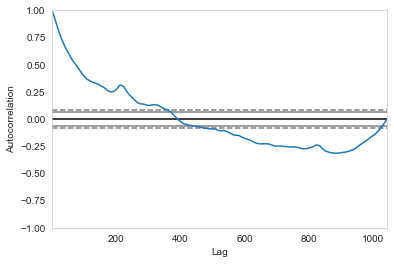

In [120]:
pd.plotting.autocorrelation_plot(df_imputation['2017': '2020']['Spx'])

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

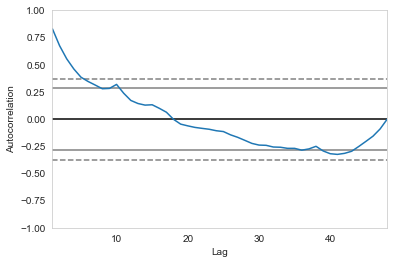

In [121]:
pd.plotting.autocorrelation_plot(df_imputation['2017': '2020']['Spx'].resample('1m').mean())

In [ ]:
# there is no apparent correlation

## Visualizing the data with lags

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 24)'>

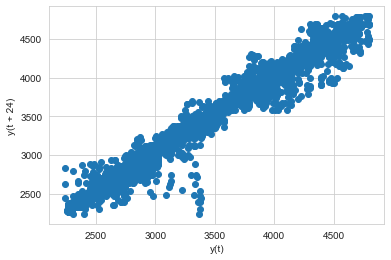

In [122]:
pd.plotting.lag_plot(df_imputation['Spx'], lag=1)
pd.plotting.lag_plot(df_imputation['Spx'], lag=3)
pd.plotting.lag_plot(df_imputation['Spx'], lag=24)

## Automated EDA using Pandas Profiling

In [123]:
# Generate the Profiling Report
profile = ProfileReport(
    df_imputation, title=" Index and commodities", html={"style": {"full_width": True}}, sort=None
)

In [124]:
# The Notebook IFrame Interface
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
profile.to_file("index_commodities_profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]